In [1]:
import pandas as pd

from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Load cleaned data
df = pd.read_csv("../data/processed/chicago_crime_clean.csv")

df["date"] = pd.to_datetime(df["date"])

# Extract hour of day
df["hour"] = df["date"].dt.hour

df[["latitude", "longitude", "hour"]].head()

,latitude,longitude,hour
0,41.731145,-87.574354,0
1,41.873808,-87.694456,0
2,41.751810,-87.724634,0
3,41.980779,-87.805438,0
4,41.779998,-87.629295,0


In [2]:
X = df[["latitude", "longitude", "hour"]]

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [3]:
dbscan = DBSCAN(
    eps=0.25,        # tighter than spatial-only
    min_samples=15   # minimum crimes to form hotspot
)

df["st_cluster"] = dbscan.fit_predict(X_scaled)


In [4]:
df["st_cluster"].value_counts()


st_cluster
 1    2688
-1    1952
 2      87
 5      61
 0      57
 6      33
 4      32
 7      24
 8      18
 3      17
 9      15
Name: count, dtype: int64

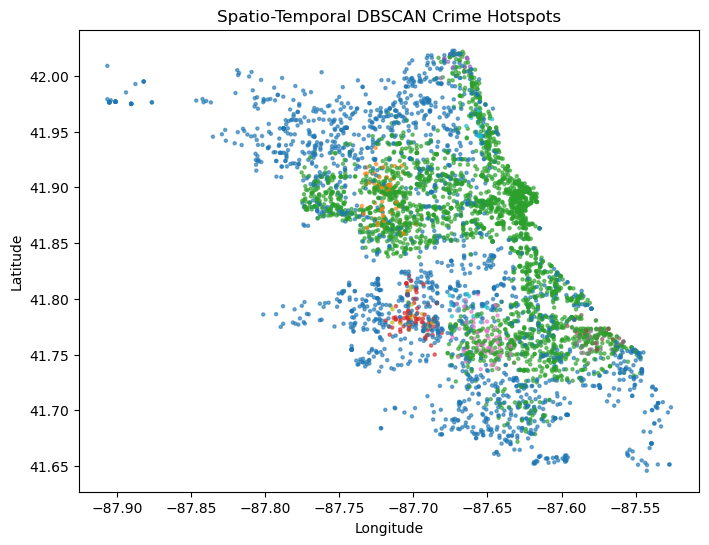

In [5]:
plt.figure(figsize=(8, 6))

plt.scatter(
    df["longitude"],
    df["latitude"],
    c=df["st_cluster"],
    cmap="tab10",
    s=5,
    alpha=0.6
)

plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title("Spatio-Temporal DBSCAN Crime Hotspots")
plt.show()


In [6]:
df.groupby("st_cluster")["hour"].describe()

,count,mean,std,min,25%,50%,75%,max
st_cluster,,,,,,,,
-1,1952.0,10.450820,7.374415,0.0,4.0,10.0,17.0,23.0
0,57.0,0.754386,0.911841,0.0,0.0,0.0,1.0,3.0
1,2688.0,14.942336,4.683669,0.0,12.0,15.0,18.0,23.0
2,87.0,16.287356,1.922378,13.0,15.0,16.0,18.0,20.0
3,17.0,8.000000,0.707107,7.0,8.0,8.0,8.0,9.0
4,32.0,6.625000,1.008032,5.0,6.0,7.0,7.0,8.0
5,61.0,1.000000,1.140175,0.0,0.0,1.0,2.0,4.0
6,33.0,0.787879,0.819969,0.0,0.0,1.0,1.0,2.0
7,24.0,22.000000,0.834058,21.0,21.0,22.0,23.0,23.0
